# Visualizing Qualitative Data
<hr style="height:1px;border:none;color:#666;background-color:#666;" />

For qualitative or categorical data, we most often use bar charts and dot charts. We will show how to create these plots using `seaborn` and the Titanic survivors dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Load the dataset
titanic = sns.load_dataset('titanic').reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Bar Charts
<hr>

In `seaborn`, there are two types of bar charts. The first type uses the `countplot` method to count up the number of times each category appears in a column.

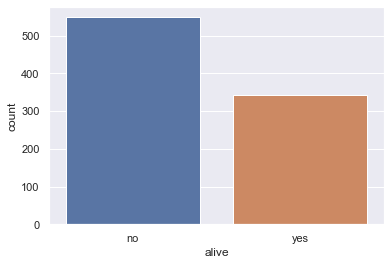

In [3]:
# Counts how many passengers survived and didn't survive and
# draws bars with corresponding heights
sns.countplot(x='alive', data=titanic);

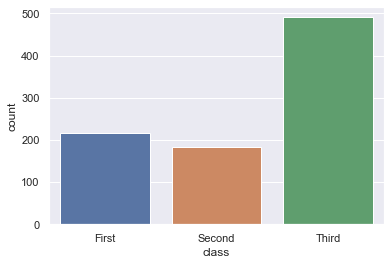

In [5]:
sns.countplot(x='class', data=titanic);

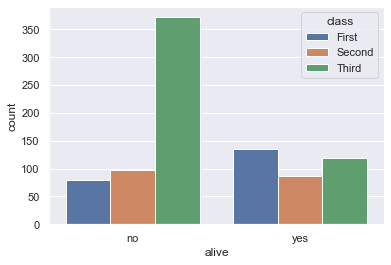

In [6]:
# As with box plots, we can break down each category further using color
sns.countplot(x='alive', hue='class', data=titanic);

The `barplot` method, on the other hand, groups the DataFrame by a categorical column and plots the height of the bars according to the average of a numerical column within each group.

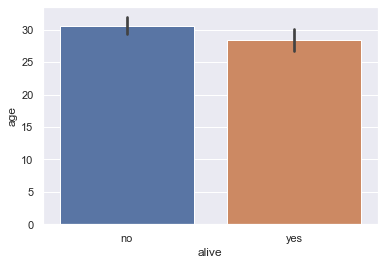

In [7]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.barplot(x='alive', y='age', data=titanic);

The height of each bar can be computed by grouping the original DataFrame and averaging the `age` column:

In [10]:
titanic[['alive', 'age']].groupby('alive').mean()

,age
alive,
no,30.626179
yes,28.343690


By default, the `barplot` method will also compute a bootstrap 95% confidence interval for each averaged value, marked as the black lines in the bar chart above. The confidence intervals show that if the dataset contained a random sample of Titanic passengers, the difference between passenger age for those that survived and those that didn't is not statistically significant at the 5% significance level.

These confidence intervals take long to generate when we have larger datasets so it is sometimes useful to turn them off:

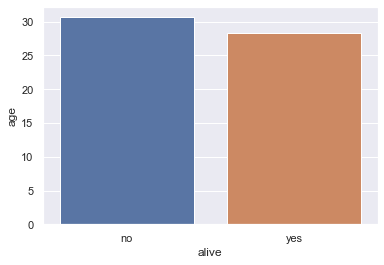

In [11]:
sns.barplot(x='alive', y='age', data=titanic, ci=False);

## Dot Charts
<hr>

Dot charts are similar to bar charts. Instead of plotting bars, dot charts mark a single point at the end of where a bar would go. We use the `pointplot` method to make dot charts in seaborn. Like the `barplot` method, the pointplot method also automatically groups the DataFrame and computes the average of a separate numerical variable, marking 95% confidence intervals as vertical lines centered on each point.

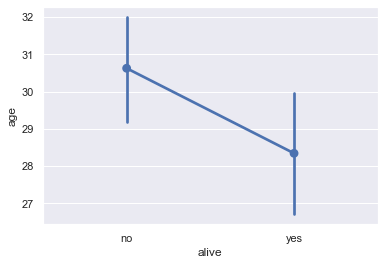

In [12]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.pointplot(x='alive', y='age', data=titanic);

Dot charts are most useful when comparing changes across categories:

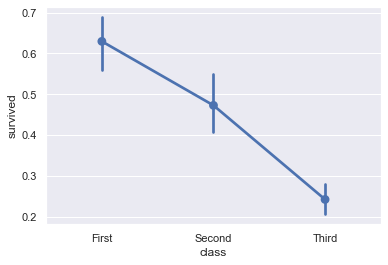

In [13]:
# Shows the proportion of survivors for each passenger class
sns.pointplot(x='class', y='survived', data=titanic);

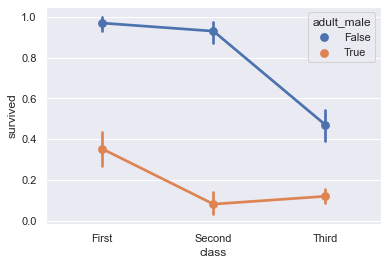

In [14]:
# Shows the proportion of survivors for each passenger class,
# split by whether the passenger was an adult male
sns.pointplot(x='class', y='survived', hue='adult_male', data=titanic);